<a href="https://colab.research.google.com/github/Spookytober/Datascience/blob/main/Aubr_OrfUnit7Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 7 Project: Polynomials, Splines, and GPs, Oh my!

**Task**:

Two parts:

1. Propose a data set that's compatible with pymc and/or bambi. I must approve your submission before you move on to part 2.

2. Create, analyze, and present any guassian process or approximate GP, degenerate or otherwise (this means glms and b splines are allowed), using pymc within the colab environment, on a data set of your choice, with the following conditions:
  - your final model must have more than 2 predictors. The intercept term doesn't count as a predictor here (even though technically it is), or if must be an actual GP
  - You must document and explain your model selection method. This means you must argue that your model choice (glm, b spline, GP) is better than at least one other choice. You may use either a theoretical or numerical argument.



Guidlines:

- Your data or your model type must be different from any project you've previously done.

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a model or likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Choose a data set with lots of columns, and lots of potential interactions between variables. It'll be more fun, and will make model/variable selection more relevant.

- This is not a competition to come up with the fanciest model structure. Find a data set that interests you, and apply the simplest model that captures the patterns in the data.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- I actually encourge you to use b splines; they work quite well, and trying to determine the location of the knots requires careful thought about the context of the data.

- Its ok to pick a data set for which you don't qute understand the context--so long as you think the context is cool.


In [1]:
#installing libraries
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr
!pip install bambi
import bambi as bmb
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-d1n4jeiw
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-d1n4jeiw
  Resolved https://github.com/pydata/xarray.git to commit 0184702f16c3f744fc9096c7dac690626dcc6922
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev22+g0184702f-py3-none-any.whl size=1262235 sha256=702bfee54a693516dd643f098f283813fb3a69fed19401bbadb2bba25a8befc0
  Stored in directory: /tmp/pip-ephem-wheel-cache-xz24vo9m/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 5.0 MB/s eta 0:00:00
   ━


# Converting the weird files into CSVs.

The following code was generated by ChatGPT Generative AI in order to concatenate the files and download them as a csv. Both of these files were in an obscure file format.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = "/content/drive/My Drive/oly"

In [ ]:
import xarray as xr
import os

# List all NetCDF files in the directory
nc_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.nc')]

# Load and combine datasets
datasets = [xr.open_dataset(f) for f in nc_files]
combined = xr.concat(datasets, dim='time')

# Save the combined dataset
combined.to_netcdf('/content/oly_data.nc')

<ipython-input-3-93858f0646f0>:12: UserWarning: Times can't be serialized faithfully to int64 with requested units 'minutes since 2018-11-02T17:45:30'. Serializing with units 'seconds since 2018-11-02T17:45:30' instead. Set encoding['dtype'] to floating point dtype to serialize with units 'minutes since 2018-11-02T17:45:30'. Set encoding['units'] to 'seconds since 2018-11-02T17:45:30' to silence this warning .
  combined.to_netcdf('/content/oly_data.nc')


In [ ]:

# Define the file path (modify if necessary)
nc_file = "/content/oly_data.nc"  # Update with your actual file path

# Open the NetCDF file
ds = xr.open_dataset(nc_file)

# Display dataset structure
print(ds)


<xarray.Dataset> Size: 377kB
Dimensions:     (time: 6730, lat: 1, lon: 1)
Coordinates:
  * time        (time) datetime64[ns] 54kB 2018-11-02T17:45:30 ... 2019-04-22...
  * lat         (lat) float64 8B 47.05
  * lon         (lon) float64 8B -122.9
Data variables:
    P_1ac       (time) float64 54kB ...
    T_28        (time) float64 54kB ...
    C_51        (time) float64 54kB ...
    S_41        (time) float64 54kB ...
    depth       (time) float64 54kB ...
    waterlevel  (time) float64 54kB ...
Attributes: (12/32)
    type:              Linear Average
    sample_interval:   1.0 secs
    samples_averaged:  60.0
    serial_number:     615203
    INST_TYPE:         Aqua TROLL 200
    SciPi:             D. Nowacki
    ...                ...
    elev_error_note:   Estimate in m of uncertainty in elev_offset
    title:             PSWL Olympia
    history:           Data clipped using Deployment_date of 2018-11-02 17:44...
    start_time:        2018-11-02T17:45:30.000000000
    stop_time

In [ ]:
# Install necessary libraries
!pip install xarray netCDF4 pandas

import xarray as xr
import pandas as pd
from google.colab import files

# Define file paths
nc_file = "/content/oly_data.nc"  # Make sure the file is in the Colab directory
csv_file = "/content/oly_data.csv"

# Load NetCDF file
ds = xr.open_dataset(nc_file)

# Convert NetCDF to a pandas DataFrame
df = ds.to_dataframe().reset_index()

# Save as CSV
df.to_csv(csv_file, index=False)
print(f"CSV file saved as: {csv_file}")

# Download the CSV file to your computer
files.download(csv_file)


CSV file saved as: /content/oly_data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Project Start!

My project will be working with some data gathered from Puget Sound in Washington. It measures time, pressure (P_1ac), Temperature (T_28), Conductivity (C_51), depth, waterlevel, and a few other things.

In [88]:
oly = pd.read_csv("https://raw.githubusercontent.com/Spookytober/Datascience/refs/heads/main/oly_data.csv")
time = oly['time'].values
pressure = oly['P_1ac'].values
oly

,time,lat,lon,P_1ac,T_28,C_51,S_41,depth,waterlevel
0,2018-11-02 17:45:30,47.051244,-122.905339,38.960,12.947,33205.023,27.652663,3.891292,1.228292
1,2018-11-02 18:00:30,47.051244,-122.905339,41.235,12.923,34291.316,28.674440,4.115315,1.452315
2,2018-11-02 18:15:30,47.051244,-122.905339,43.482,12.934,34382.535,28.751321,4.339326,1.676326
3,2018-11-02 18:30:30,47.051244,-122.905339,45.592,12.932,34435.668,28.802047,4.549719,1.886719
4,2018-11-02 18:45:30,47.051244,-122.905339,47.564,12.936,34484.727,28.844753,4.746359,2.083359
...,...,...,...,...,...,...,...,...,...
6725,2019-04-22 10:00:05,47.051244,-122.905339,30.940,10.228,30964.172,27.399479,3.089443,0.426443
6726,2019-04-22 10:15:05,47.051244,-122.905339,31.751,10.100,30835.697,27.363403,3.170449,0.507449
6727,2019-04-22 10:30:05,47.051244,-122.905339,33.002,9.992,30840.922,27.444733,3.295107,0.632107
6728,2019-04-22 10:45:05,47.051244,-122.905339,34.375,9.963,30866.891,27.490876,3.432059,0.769059


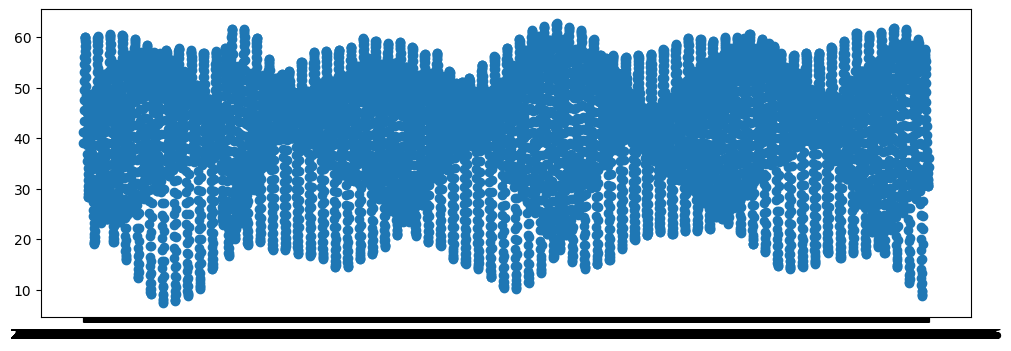

In [ ]:
plt.figure(figsize=(12,4))
plt.scatter(oly['time'], oly['P_1ac'])

Okay. That's a LOT of data points. I'm going to remove 3/4 of the data points, so instead of the model using data taken every 15 minutes, we'll get data taken every hour. This code was found online.

In [114]:
oly_prime = oly.iloc[3::4]
oly_prime = oly_prime.reset_index(drop=True)
oly_prime

,time,lat,lon,P_1ac,T_28,C_51,S_41,depth,waterlevel
0,2018-11-02 18:30:30,47.051244,-122.905339,45.592,12.932,34435.668,28.802047,4.549719,1.886719
1,2018-11-02 19:30:30,47.051244,-122.905339,53.111,12.903,34612.313,28.986730,5.299286,2.636286
2,2018-11-02 20:30:30,47.051244,-122.905339,58.237,12.911,34720.605,29.081702,5.810337,3.147337
3,2018-11-02 21:30:30,47.051244,-122.905339,60.111,12.930,34785.023,29.128001,5.997118,3.334118
4,2018-11-02 22:30:30,47.051244,-122.905339,58.123,12.921,34822.246,29.169062,5.798591,3.135591
...,...,...,...,...,...,...,...,...,...
1677,2019-04-22 06:30:05,47.051244,-122.905339,43.833,10.306,31343.770,27.716389,4.375840,1.712840
1678,2019-04-22 07:30:05,47.051244,-122.905339,37.455,10.352,31394.113,27.733014,3.739105,1.076105
1679,2019-04-22 08:30:05,47.051244,-122.905339,32.557,10.063,31140.557,27.689646,3.250104,0.587104
1680,2019-04-22 09:30:05,47.051244,-122.905339,30.456,10.221,31080.822,27.518800,3.040834,0.377834


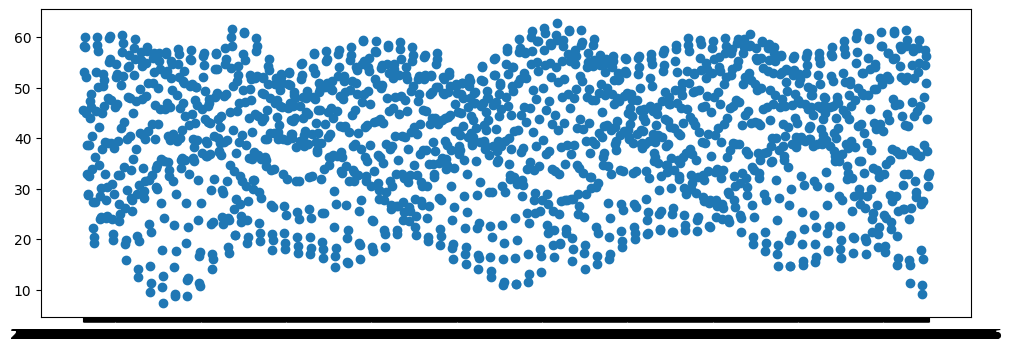

In [ ]:
plt.figure(figsize=(12,4))
plt.scatter(oly_prime['time'], oly_prime['P_1ac'])

This data is of water pressure over time in one part of Puget Sound in Washington. The extreme fluctuations are likely due to the temperature changing, as pressure is heavily related to that.

The first thing I'm going to try to do is copy the code for the GP from the exercises, making tweaks to variables in order to try and make it work.

In [6]:
!pip install preliz
import pymc as pm
import preliz as pz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.1/517.1 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 31.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [13]:
time = oly_prime['time'].values
pressure = oly_prime['P_1ac'].values

In [72]:
def get_ig_params(x_vals, l_b=None, u_b=None, mass=0.96, plot=False):

    differences = np.abs(np.subtract.outer(x_vals, x_vals))
    if l_b is None:
        l_b = np.min(differences[differences != 0]) * 2
    if u_b is None:
        u_b = np.max(differences) / 1.5

    dist = pz.InverseGamma()
    pz.maxent(dist, l_b, u_b, mass, plot=plot)

    return dict(zip(dist.param_names, dist.params))

In [ ]:
with pm.Model() as model_hsgp_oly:
    ℓ = pm.InverseGamma('ℓ', **get_ig_params(time))
    cov = pm.gp.cov.ExpQuad(1, ls=ℓ)
    gp = pm.gp.HSGP(m=[10], c=1.5, cov_func=cov)
    f = gp.prior('f', X=time)
    α = pm.HalfNormal('α', 1)
    y = pm.Normal("y", np.exp(f), α, observed=pressure)
    idata_hsgp_oly = pm.sample()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [12]:
print(time.dtype)

object


Ah. That makes sense for why that wasn't working. I need to convert my time into "time since the start of the data gathering" or at least something similar. I don't really know why I thought this would work by leaving it as a date and time format. I'm going to go ahead and convert it. I also had accidentally left the likelihood as a negative binomial, so it wouldn't work well anyway.

# Time conversion

In [14]:
#This code was partially found online and edited to fit my own data.
time_data = oly_prime.time
time_series = pd.to_datetime(time_data)
reference_time = time_series.min()
time_float = (time_series - reference_time).dt.total_seconds()
time_float = np.array(time_float, dtype=float)
print(time_float)

[0.0000000e+00 3.6000000e+03 7.2000000e+03 ... 1.4738375e+07 1.4741975e+07
 1.4745575e+07]


In [15]:
T_list = time_float.tolist()
time_list = [[x] for x in T_list]
print(time_list)

[[0.0], [3600.0], [7200.0], [10800.0], [14400.0], [18000.0], [21600.0], [25200.0], [28800.0], [32400.0], [36000.0], [39600.0], [43200.0], [46800.0], [50400.0], [54000.0], [57600.0], [61200.0], [64800.0], [68400.0], [72000.0], [75600.0], [79200.0], [82800.0], [86400.0], [90000.0], [93600.0], [97200.0], [100800.0], [104400.0], [108000.0], [111600.0], [115200.0], [118800.0], [122400.0], [126000.0], [129600.0], [133200.0], [136800.0], [140400.0], [144000.0], [147600.0], [151200.0], [154800.0], [158400.0], [162000.0], [165600.0], [169200.0], [172800.0], [176400.0], [180000.0], [183600.0], [187200.0], [190800.0], [194400.0], [198000.0], [201600.0], [205200.0], [208800.0], [212400.0], [216000.0], [219600.0], [223200.0], [226800.0], [230400.0], [234000.0], [237600.0], [241200.0], [244800.0], [248400.0], [252000.0], [255600.0], [259200.0], [262800.0], [266400.0], [270000.0], [273600.0], [277200.0], [280800.0], [284400.0], [288000.0], [291600.0], [295200.0], [298800.0], [302400.0], [306000.0], [

In [16]:
tl_arr = np.array(time_list, dtype=float)
print(tl_arr)

[[0.0000000e+00]
 [3.6000000e+03]
 [7.2000000e+03]
 ...
 [1.4738375e+07]
 [1.4741975e+07]
 [1.4745575e+07]]


In [119]:
t1me = pd.to_datetime(oly_prime["time"]).astype(int)/10**11
t1me = t1me.values[:,None]

In [120]:
print(t1me)

[[0.00015412]
 [0.00015412]
 [0.00015412]
 ...
 [0.00015559]
 [0.00015559]
 [0.00015559]]


This is good. My time data is now in the form of seconds since the beginning of data gathering. Each data point is approximately  one hour apart, save for the small drift over time. I'm going to try the code from the exercises again.

EDIT: I only THOUGHT that each data point was an hour apart. I found out where that drift came from later on--there is a giant jump in time after about an eigth of the total data.

#GP and B-Splines

In [49]:
with pm.Model() as model_hsgp_oly:
    ℓ = pm.InverseGamma('ℓ', **get_ig_params(tl_arr))
    cov = pm.gp.cov.ExpQuad(1, ls=ℓ)
    gp = pm.gp.HSGP(m=[10], c=1.5, cov_func=cov)
    f = gp.prior('f', X=tl_arr)
    α = pm.HalfNormal('α', 1)
    y = pm.Normal("y", np.exp(f), α, observed=pressure)
    idata_hsgp_oly = pm.sample()

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7e29b1f3aa20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.11/dist-packages/scipy.libs/libopenblasp-r0-01191904.3.

Output()

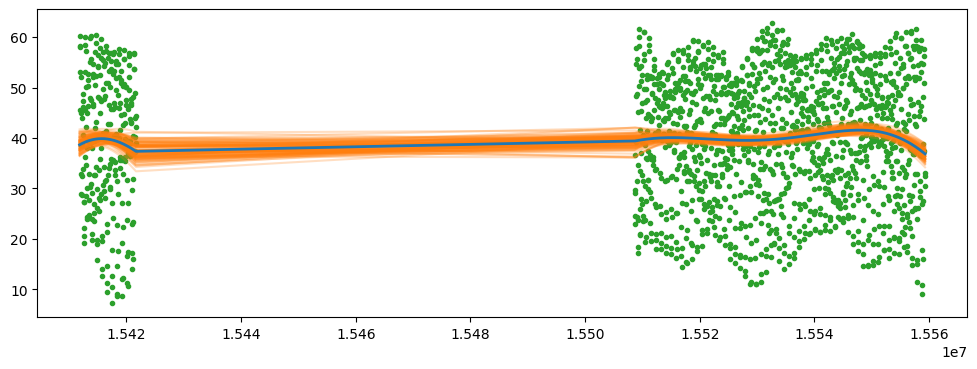

In [50]:
_, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(time, oly_prime["P_1ac"].values, "C2.")
f = az.extract(idata_hsgp_oly, group="posterior", var_names="f")
idx = np.argsort(time)
ax.plot(time[idx], np.exp(f.values[idx,:100]), alpha=0.25, color="C1")
ax.plot(time[idx], np.exp(f.values[idx].mean(1)), color="C0", lw=2)

There seems to be a sizeable gap in my data.

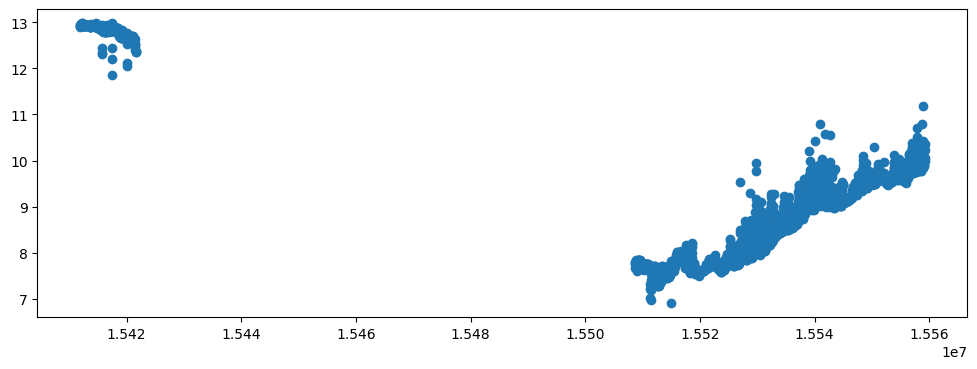

In [55]:
#graph of temperature against time to make sure it wasn't just an issue with pressure.
plt.figure(figsize=(12,4))
plt.scatter(t1me, oly_prime['T_28'])

Next, I'm going to try using a b spline. I feel like there are about 5 pretty evenly spaced curves, so I'll set 4 knots and see if a b spline can perform better than the GP.

# Old B Spline testing (before I realized there was a gap in the data)

In [56]:
num_knots = 4
knots = np.linspace(0, 1.4745575e+07, num_knots+2)[1:-1]
model_spline = bmb.Model("P_1ac ~ bs(time, degree=3, knots=knots)", oly_prime, family="gaussian")
idata_spline = model_spline.fit()

ValueError: Some knot values [ 2949115.  5898230.  8847345. 11796460.] fall below lower bound 15411834.3

In [33]:
print(knots)

[ 2949115.  5898230.  8847345. 11796460.]


/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


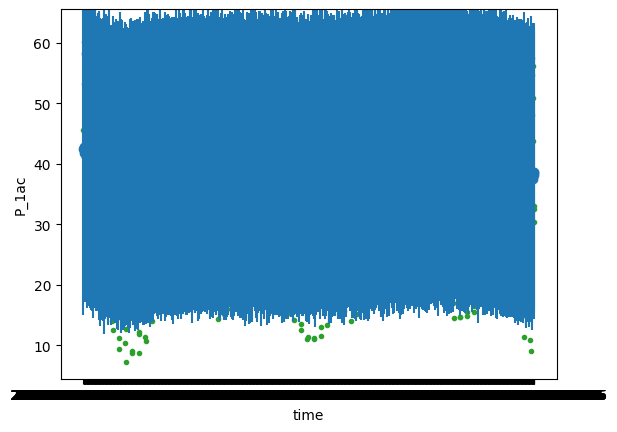

In [32]:
bmb.interpret.plot_predictions(model_spline, idata_spline, "time", pps= True)
plt.plot(oly_prime.time, oly_prime.P_1ac, "C2.", zorder=-3)

Not a fan of the blue rectangle. Let's see if changing the degree of the polynomial changes anything.

In [38]:
num_knots = 4
knots = np.linspace(0, 1.4745575e+07, num_knots+2)[1:-1]
model_spline1 = bmb.Model("P_1ac ~ bs(time_float, degree=2, knots=knots)", oly_prime, family="gaussian")
idata_spline1 = model_spline1.fit(idata_kwargs={'log_likelihood': True})

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7e29b3e9e2a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.11/dist-packages/scipy.libs/libopenblasp-r0-01191904.3.

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


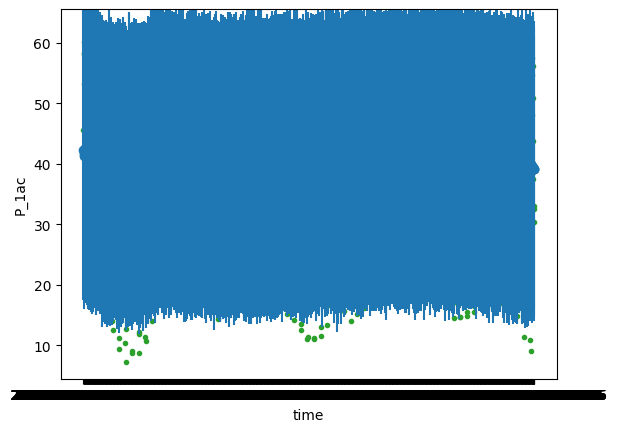

In [39]:
bmb.interpret.plot_predictions(model_spline1, idata_spline1, "time", pps= True)
plt.plot(oly_prime.time, oly_prime.P_1ac, "C2.", zorder=-3)

# New Models with the lower data dropped

In [117]:
#Need to drop the lower values
oly_prime["time"] = t1me
oly_two = oly_prime.query('time >= 1.55e7')
oly_two

,time,lat,lon,P_1ac,T_28,C_51,S_41,depth,waterlevel
274,15508638.05,47.051244,-122.905339,36.592,7.680,25700.426,23.838017,3.662518,0.999518
275,15508674.05,47.051244,-122.905339,29.649,7.765,25219.039,23.293401,2.968861,0.305861
276,15508710.05,47.051244,-122.905339,24.468,7.791,24210.316,22.253998,2.452036,-0.210964
277,15508746.05,47.051244,-122.905339,23.039,7.810,23243.299,21.267529,2.310589,-0.352411
278,15508782.05,47.051244,-122.905339,29.155,7.807,26812.400,24.894192,2.915819,0.252819
...,...,...,...,...,...,...,...,...,...
1677,15559146.05,47.051244,-122.905339,43.833,10.306,31343.770,27.716389,4.375840,1.712840
1678,15559182.05,47.051244,-122.905339,37.455,10.352,31394.113,27.733014,3.739105,1.076105
1679,15559218.05,47.051244,-122.905339,32.557,10.063,31140.557,27.689646,3.250104,0.587104
1680,15559254.05,47.051244,-122.905339,30.456,10.221,31080.822,27.518800,3.040834,0.377834


In [107]:
# Trim to the smallest dataset
min_size = min(len(t1me), len(oly_two["P_1ac"]))
t1me = t1me[:min_size]
oly_two = oly_two.iloc[:min_size]


In [63]:
num_knots = 4
knots = np.linspace(15508638.05, 15559290.05, num_knots+2)[1:-1]
model_spline = bmb.Model("P_1ac ~ bs(time, degree=3, knots=knots)", oly_two, family="gaussian")
idata_spline = model_spline.fit()

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7e29d9aea480>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.11/dist-packages/scipy.libs/libopenblasp-r0-01191904.3.

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


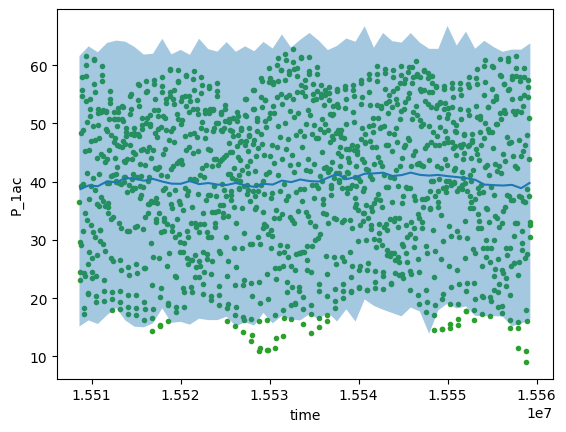

In [65]:
bmb.interpret.plot_predictions(model_spline, idata_spline, "time", pps= True)
plt.plot(oly_two.time, oly_two.P_1ac, "C2.", zorder=-3)

In [126]:
p1ac = oly_two['P_1ac'].values

In [129]:
time2 = oly_two['time'].values[:,None]

In [130]:
with pm.Model() as model_hsgp_oly2:
    ℓ = pm.InverseGamma('ℓ', **get_ig_params(time2))
    cov = pm.gp.cov.ExpQuad(1, ls=ℓ)
    gp = pm.gp.HSGP(m=[10], c=1.5, cov_func=cov)
    f = gp.prior('f', X=time2)
    α = pm.HalfNormal('α', 1)
    y = pm.Normal("y", np.exp(f), α, observed=p1ac)
    idata_hsgp_oly2 = pm.sample()

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7e29a9382de0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /usr/local/lib/python3.11/dist-packages/scipy.libs/libopenblasp-r0-01191904.3.

Output()

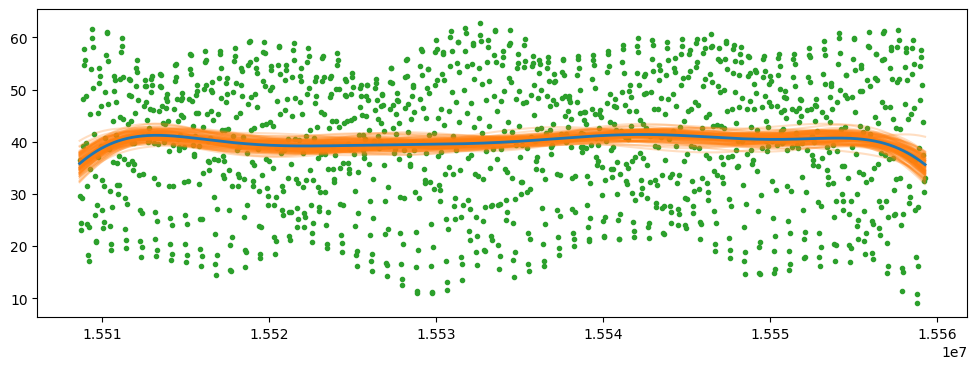

In [133]:
_, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(oly_two["time"].values, oly_two["P_1ac"].values, "C2.")
f = az.extract(idata_hsgp_oly2, group="posterior", var_names="f")
idx = np.argsort(oly_two["time"].values)
ax.plot(oly_two["time"].values[idx], np.exp(f.values[idx,:100]), alpha=0.25, color="C1")
ax.plot(oly_two["time"].values[idx], np.exp(f.values[idx].mean(1)), color="C0", lw=2)

Both my new GP and my B Spline seem to agree in a few trends, those being mentioned above. I'm going to get the posterior predictive of this GP now.

In [135]:
pm.sample_posterior_predictive(idata_hsgp_oly2, model = model_hsgp_oly2, extend_inferencedata = True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

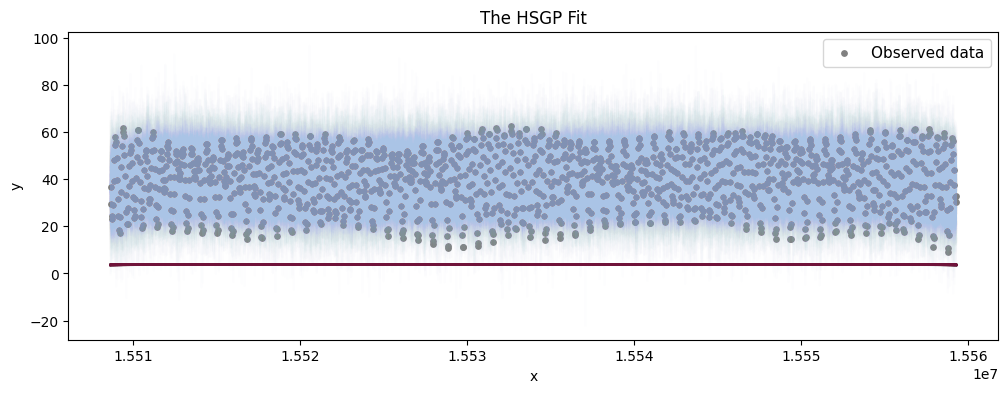

In [139]:
fig = plt.figure(figsize=(12, 4))
ax = fig.gca()

f = az.extract(idata_hsgp_oly2.posterior.sel(draw=slice(None, None, 10)), var_names="f")
y_preds = az.extract(idata_hsgp_oly2.posterior_predictive.sel(draw=slice(None, None, 10)), var_names="y")

ax.plot(time2, y_preds, color="#AAC4E6", alpha=0.02)
ax.plot(time2, f, color="#70133A", alpha=0.1)
ax.scatter(time2, p1ac, marker="o", color="grey", s=15, label="Observed data")

ax.set(title="The HSGP Fit", xlabel="x", ylabel="y")
ax.legend(frameon=True, fontsize=11, ncol=2);

Okay. It's not perfect, but it will do for now.

# Conclusion

In my data, there were a few interesting patterns. First off, there was a huge jump in time. When I first downloaded the files, there was more than one file for the location labeled "oly." One of them was over twice the size of the other, and I believe that it was that file which held the brunt of the data, after the gap.
There were also a lot of data points that followed certain trends, looking like curves in my data. I believe that my issues in my Gaussian Process and my B Spline were due to the sheer amount of data, and a lot of it could have been fixed by adding a categorical variable. My hypothesis is that these trend lines in the pressure were created by tides, because this data takes place a long period of time and the tides, leading to small offsets of pressure at specific times of day, would create data that looks, when squished, a lot like a single curve. Having a categorical variable related to when the tides roll in would be incredibly helpful. However, the "depth" variable and the "water_level" variable were both incredibly *unhelpful*.

I am, at this point, almost entirely certain that the reason why some pressures are lower in certain places is thanks to the cycle of the moon and its relation to the tides. The reason why there are "curves" in the data is that, when the moon is in a certain position, the water is always higher than when the moon is in other positions. Unfortunately, I did not have the data to actually make a model that relied on the tides as a categorical variable.

All in all, I'm fairly happy with my models that I made. The B-Spline model and the Gaussian Process seemed to do similarly well to each other, but if there was a categorical variable that included the tides, I think the GP would improve drastically and would be able to better model individual parts of the data.